<a href="https://colab.research.google.com/github/gitmayanksingh/MachineLearning-Deep-Learning/blob/master/ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
path = 'drive/My Drive/data/ipldata/'
deliveries = pd.read_csv(path+'deliveries.csv')
matches = pd.read_csv(path+'matches.csv')

In [0]:
#Replacing the Team Names with their abbreviations

matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Delhi Capitals',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DCS','CSK','RR','DD','GL','KXIP','DC','SRH','RPS','KTK','PW','RPS'],inplace=True)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Delhi Capitals',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DCS','CSK','RR','DD','GL','KXIP','DC','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [6]:
print('Shape Deliveries: ',deliveries.shape)
print('Shape Matches: ',matches.shape)

Shape Deliveries:  (179078, 21)
Shape Matches:  (756, 18)


In [7]:
deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [8]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [0]:
matches.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN
deliveries.fillna(0,inplace=True) 

In [10]:
print('Total number of IPL-Seasons played till now: ',matches.season.nunique())

Total number of IPL-Seasons played till now:  12


In [11]:
print('List of Teams played in IPL till now:\n ',np.unique(matches[['team1','team2']].values))

List of Teams played in IPL till now:
  ['CSK' 'DC' 'DCS' 'DD' 'GL' 'KKR' 'KTK' 'KXIP' 'MI' 'PW' 'RCB' 'RPS' 'RR'
 'SRH']


In [12]:
print('First IPL match :\n')
x= matches[matches.season==matches.season.min()]
one_ipl = x[x.date==x.date.min()]
one_ipl[['season','city','date','team1','team2','winner','win_by_runs','player_of_match']].style.background_gradient(cmap='viridis')

First IPL match :



,season,city,date,team1,team2,winner,win_by_runs,player_of_match
59,2008,Bangalore,2008-04-18,KKR,RCB,KKR,140,BB McCullum


In [13]:
print('Last IPL match :\n')
x= matches[matches.season==matches.season.max()]
#last_ipl = x[x.date==x.date.max()]
x[['season','city','date','team1','team2','winner','win_by_runs','player_of_match']].tail(1).style.background_gradient(cmap='viridis')

Last IPL match :



,season,city,date,team1,team2,winner,win_by_runs,player_of_match
755,2019,Hyderabad,12/05/19,MI,CSK,MI,1,JJ Bumrah


In [14]:
print('List of Cities where IPL happened :',list(matches.city.unique()))

List of Cities where IPL happened : ['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai', 'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi', 'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan, 'Mohali', 'Bengaluru']


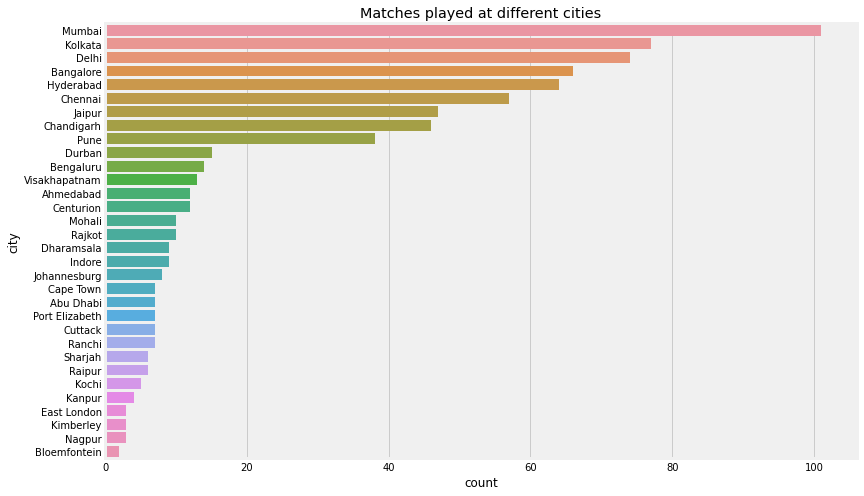

In [15]:
plt.figure(figsize=(12,8))
plt.title('Matches played at different cities')
sns.countplot(y=matches.city,orient='h',order = matches.city.value_counts().index)
plt.show()

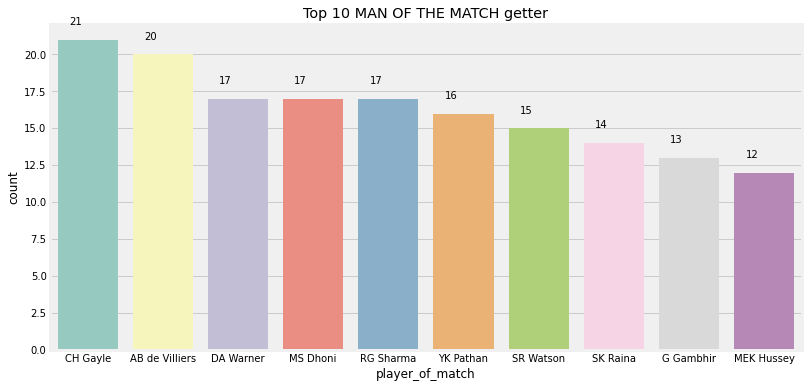

In [16]:
plt.figure(figsize=(12,6))
plt.title('Top 10 MAN OF THE MATCH getter')
ax=sns.countplot(x=matches.player_of_match,order = matches.player_of_match.value_counts()[:10].index,palette="Set3")
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

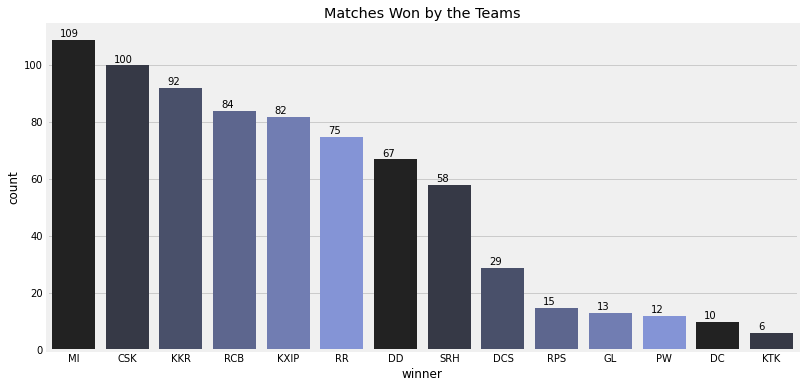

In [17]:
plt.figure(figsize=(12,6))
plt.title('Matches Won by the Teams')
ax=sns.countplot(x=matches['winner'],order = matches['winner'].value_counts().index,palette=sns.dark_palette((260, 75, 60), input="husl"))

for p in ax.patches:
    #print(ax.patches)
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [18]:
matches_played_by_teams = pd.concat([matches.team1,matches.team2])
matches_played_by_teams = matches_played_by_teams.value_counts().reset_index()
matches_played_by_teams.columns = ['Team','Total Matches']
wins_by_teams = matches.winner.value_counts().reset_index()
wins_by_teams.columns = ['Team','wins']
merged_team= wins_by_teams[['Team','wins']].merge(matches_played_by_teams, left_on = 'Team', right_on = 'Team', how = 'right')
merged_team['win %'] =  round((merged_team.wins/merged_team['Total Matches'])*100,2)
merged_team.style.background_gradient(cmap='Greens')

,Team,wins,Total Matches,win %
0,MI,109,187,58.290000
1,CSK,100,164,60.980000
2,KKR,92,178,51.690000
3,RCB,84,180,46.670000
4,KXIP,82,176,46.590000
5,RR,75,147,51.020000
6,DD,67,161,41.610000
7,SRH,58,108,53.700000
8,DCS,29,75,38.670000
9,RPS,15,30,50.000000


In [19]:
configure_plotly_browser_state()
trace1 = go.Bar(
    x=merged_team.Team,
    y=merged_team['Total Matches'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=merged_team.Team,
    y=merged_team['wins'],
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [0]:
b = merged_team[['Team','win %']]
b=b.sort_values(by='win %',ascending=False)

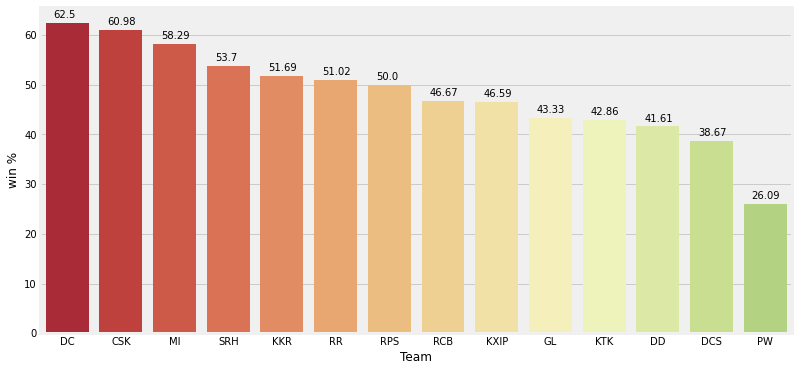

In [21]:
plt.subplots(figsize=(12,6))
ax = sns.barplot(y='win %',x='Team',data=b,palette=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [22]:
max_win_by_wickets = matches[matches['win_by_wickets']==matches.win_by_wickets.max()]
max_win_by_wickets[['season','team1','team2','winner','win_by_wickets','player_of_match']].style.background_gradient(cmap='Blues')

,season,team1,team2,winner,win_by_wickets,player_of_match
2,2017,GL,KKR,KKR,10,CA Lynn
34,2017,DD,KXIP,KXIP,10,Sandeep Sharma
71,2008,MI,DCS,DCS,10,AC Gilchrist
119,2009,KXIP,DD,DD,10,DL Vettori
183,2010,RR,RCB,RCB,10,JH Kallis
298,2011,MI,RR,RR,10,SR Watson
376,2012,RR,MI,MI,10,DR Smith
390,2013,KXIP,CSK,CSK,10,MEK Hussey
542,2015,DD,RCB,RCB,10,VR Aaron
590,2016,GL,SRH,SRH,10,B Kumar


In [23]:
max_win_by_runs = matches[matches['win_by_runs']==matches.win_by_runs.max()]
max_win_by_runs[['season','team1','team2','winner','win_by_runs','player_of_match']].style.background_gradient(cmap='Set3')

,season,team1,team2,winner,win_by_runs,player_of_match
43,2017,MI,DD,MI,146,LMP Simmons


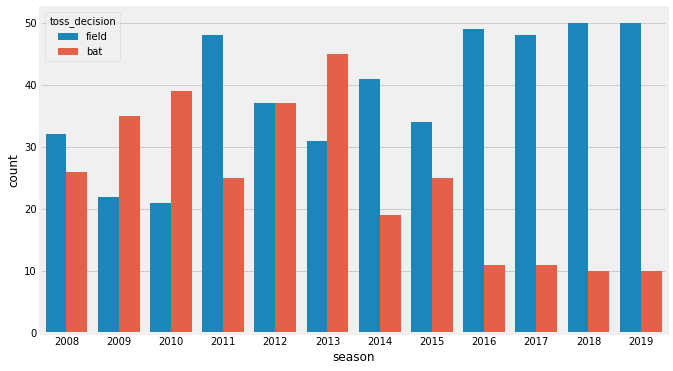

In [24]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
plt.show()

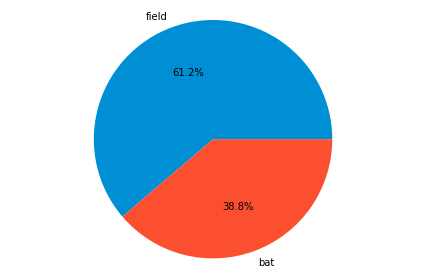

In [25]:
toss_decision = matches.toss_decision.value_counts(normalize=True)
plt.pie(toss_decision,labels=toss_decision.index,autopct='%1.1f%%',)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [26]:
match_toss = pd.concat([matches.team1,matches.team2])
match_toss = match_toss.value_counts().reset_index()
match_toss.columns = ['Team','Total Matches']
toss_wins_by_teams = matches.toss_winner.value_counts().reset_index()
toss_wins_by_teams.columns = ['Team','toss_wins']
merged_team_toss= toss_wins_by_teams[['Team','toss_wins']].merge(match_toss, left_on = 'Team', right_on = 'Team', how = 'right')
merged_team_toss['toss_win_%'] =  round((merged_team_toss.toss_wins/merged_team_toss['Total Matches'])*100,2)
temp = matches[matches.toss_winner== matches.winner]
temp = temp.winner.value_counts().reset_index()
temp.columns=['Team','match_wins']
merged_team_toss_wins= temp[['Team','match_wins']].merge(merged_team_toss, left_on = 'Team', right_on = 'Team', how = 'right')
merged_team_toss_wins['match_win_%'] = round((merged_team_toss_wins.match_wins/merged_team_toss_wins['toss_wins'])*100,2)
merged_team_toss_wins[['Team','Total Matches','toss_wins','match_wins','toss_win_%','match_win_%']].style.background_gradient(cmap='Greens')

,Team,Total Matches,toss_wins,match_wins,toss_win_%,match_win_%
0,CSK,164,89,57,54.270000,64.040000
1,MI,187,98,56,52.410000,57.140000
2,KKR,178,92,53,51.690000,57.610000
3,RR,147,80,42,54.420000,52.500000
4,RCB,180,81,41,45.000000,50.620000
5,DD,161,80,35,49.690000,43.750000
6,KXIP,176,81,35,46.020000,43.210000
7,SRH,108,46,23,42.590000,50.000000
8,DCS,75,43,19,57.330000,44.190000
9,GL,30,15,10,50.000000,66.670000


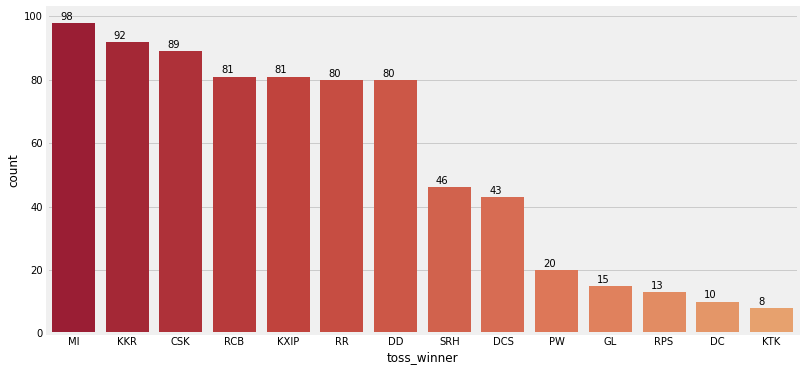

In [27]:
plt.subplots(figsize=(12,6))
ax = sns.countplot(x=matches.toss_winner,order = matches['toss_winner'].value_counts().index,palette=sns.color_palette('RdYlGn',50))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

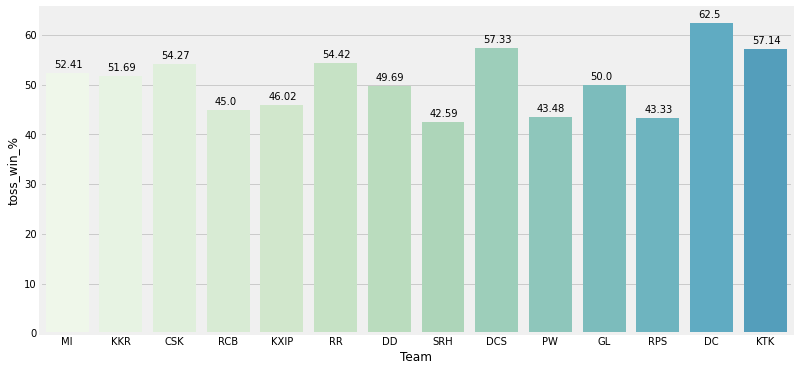

In [28]:
plt.subplots(figsize=(12,6))
ax = sns.barplot(y='toss_win_%',x='Team',data=merged_team_toss,palette=sns.color_palette('GnBu',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

**TOSS vs WIN %**

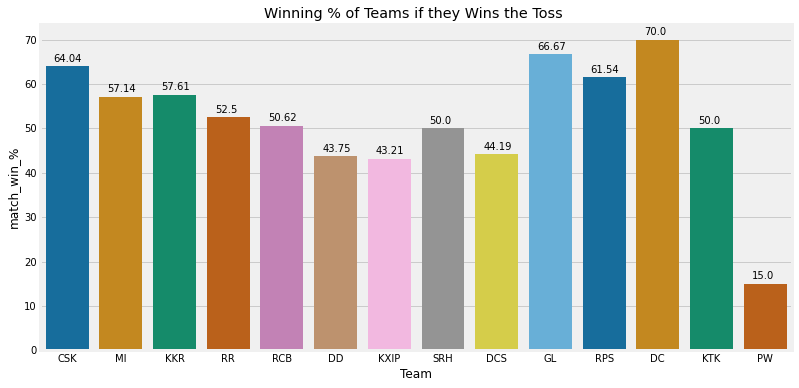

In [29]:
plt.subplots(figsize=(12,6))
plt.title('Winning % of Teams if they Wins the Toss ')
ax = sns.barplot(y='match_win_%',x='Team',data=merged_team_toss_wins,palette=sns.color_palette('colorblind',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [30]:
print('Total number of MATCHES PLAYED so far :',len(deliveries['match_id'].unique()))

Total number of MATCHES PLAYED so far : 756


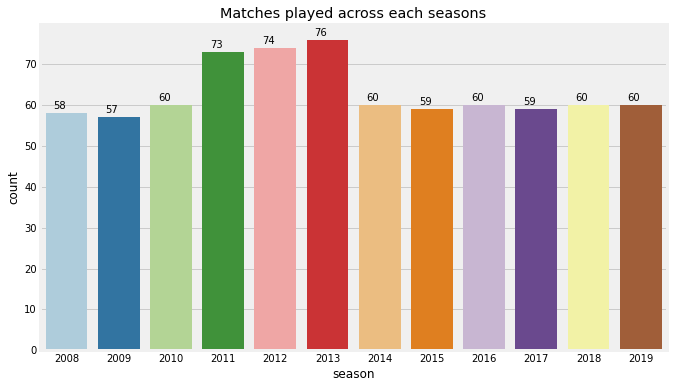

In [31]:
plt.subplots(figsize=(10,6))
plt.title('Matches played across each seasons')
ax = sns.countplot(x='season',data=matches,palette=sns.color_palette('Paired',80))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [32]:
matches_not_normal = matches[matches.result !='normal']
matches_not_normal.result.value_counts()

tie          9
no result    4
Name: result, dtype: int64

In [33]:
matches_nr = matches_not_normal[matches_not_normal['result']=='no result']
matches_nr[['season','team1','team2','result']].style.background_gradient(cmap='pink')

,season,team1,team2,result
300,2011,DD,PW,no result
545,2015,RCB,RR,no result
570,2015,DD,RCB,no result
744,2019,RCB,RR,no result


In [34]:
matches_tie = matches_not_normal[matches_not_normal['result']=='tie']
matches_tie[['season','team1','team2','result']].style.background_gradient(cmap="YlGn")

,season,team1,team2,result
33,2017,GL,MI,tie
125,2009,RR,KKR,tie
189,2010,KXIP,CSK,tie
387,2013,RCB,SRH,tie
400,2013,DD,RCB,tie
475,2014,RR,KKR,tie
535,2015,RR,KXIP,tie
705,2019,KKR,DC,tie
746,2019,MI,SRH,tie


In [35]:
matches_dl = matches[matches.dl_applied !=0]
print('Total Number of DL affected Matches :',matches_dl.shape[0],'\n list :\n')
matches_dl[['season','team1','team2','winner','player_of_match']].style.background_gradient(cmap="PRGn")

Total Number of DL affected Matches : 19 
 list :



,season,team1,team2,winner,player_of_match
56,2017,SRH,KKR,KKR,NM Coulter-Nile
99,2008,DD,KXIP,KXIP,DPMD Jayawardene
102,2008,KKR,CSK,CSK,M Ntini
119,2009,KXIP,DD,DD,DL Vettori
122,2009,KXIP,KKR,KKR,CH Gayle
148,2009,CSK,KXIP,CSK,ML Hayden
251,2011,CSK,KTK,KTK,BB McCullum
280,2011,CSK,KKR,KKR,Iqbal Abdulla
290,2011,KKR,RCB,RCB,CH Gayle
488,2014,DD,SRH,SRH,DW Steyn


In [36]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


In [0]:
from collections import Counter

In [0]:
def season_by_player(season):
  season_player = matches[matches.season==season]
  season_player = Counter(season_player.player_of_match)
  season_player = pd.DataFrame.from_dict(season_player,orient='index').reset_index()
  season_player.columns = ['player','counts']
  season_player = season_player.sort_values(by='counts',ascending=False)
  plt.subplots(figsize=(16,6))
  plt.title('Most Player-of-Match in '+str(season))
  ax = sns.barplot(y='counts',x='player',data=season_player[:10],palette=sns.color_palette('colorblind',20))
  for p in ax.patches:
      ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
  plt.show()

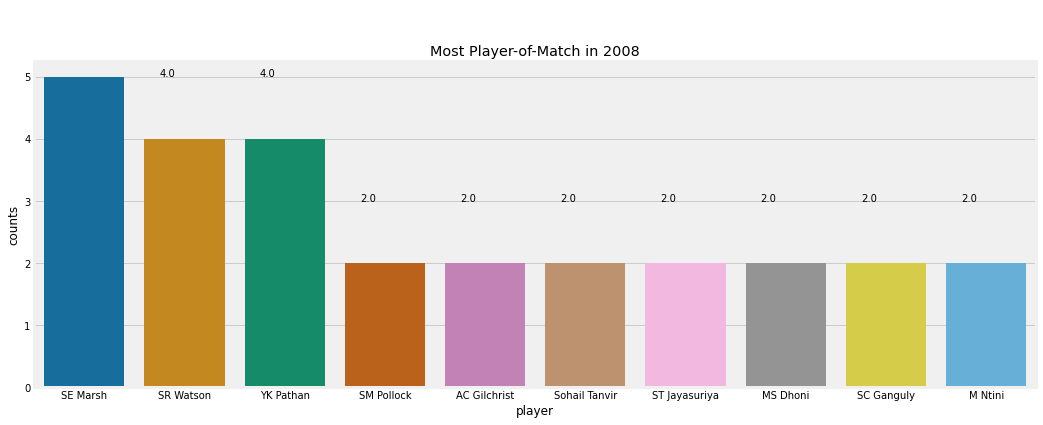

In [39]:
season_by_player(2008)

In [40]:
print('Total number of DELIVERIES BOWLED so far :',deliveries.shape[0])

Total number of DELIVERIES BOWLED so far : 179078


In [41]:
print('Total RUNS SCORED by the batsman so far :',deliveries.total_runs.sum())

Total RUNS SCORED by the batsman so far : 235290


In [42]:
print('Total number of WIDE RUNS so far :',deliveries.wide_runs.sum())
print('Total number of NO-BALL RUNS so far :',deliveries.noball_runs.sum())
print('Total number of BYE RUNS so far :',deliveries.bye_runs.sum())
print('Total number of LEG-BYE RUNS so far :',deliveries.legbye_runs.sum())
print('Total number of PENALTY RUNS so far :',deliveries.penalty_runs.sum())
print('Total number of BATSMAN RUNS so far :',deliveries.batsman_runs.sum())

Total number of WIDE RUNS so far : 6576
Total number of NO-BALL RUNS so far : 749
Total number of BYE RUNS so far : 884
Total number of LEG-BYE RUNS so far : 3785
Total number of PENALTY RUNS so far : 10
Total number of BATSMAN RUNS so far : 223286


In [43]:
total_extra_runs = deliveries.wide_runs.sum()+deliveries.noball_runs.sum()+deliveries.bye_runs.sum()+deliveries.legbye_runs.sum()+deliveries.penalty_runs.sum()
print('Total EXTRA RUNS scored by the batsman so far :',total_extra_runs)

Total EXTRA RUNS scored by the batsman so far : 12004


In [44]:
print('Total number of WICKET FALLED so far :',deliveries[deliveries['player_dismissed']!=0].shape[0])

Total number of WICKET FALLED so far : 8834


In [45]:
print('Total SUPER OVERS so far :',deliveries[deliveries.is_super_over==1].match_id.nunique())

Total SUPER OVERS so far : 7


In [46]:
runs_by_team = deliveries.groupby(by='batting_team')['batting_team','total_runs'].sum()
runs_by_team = runs_by_team.sort_values('total_runs',ascending=False).reset_index()
runs_by_team.style.background_gradient(cmap='Purples')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,batting_team,total_runs
0,MI,29809
1,RCB,28126
2,KXIP,27893
3,KKR,27419
4,CSK,26418
5,DD,24388
6,RR,22431
7,SRH,17059
8,DCS,11463
9,PW,6358


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



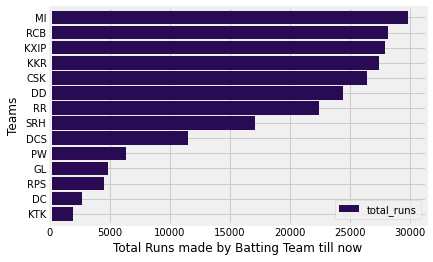

In [47]:
runs_by_team = deliveries.groupby(by='batting_team')['batting_team','total_runs'].sum().sort_values('total_runs',ascending=True)
ax = runs_by_team.plot.barh(width=.9,color=sns.color_palette('inferno'))
ax.set_xlabel('Total Runs made by Batting Team till now')
ax.set_ylabel('Teams')
plt.show()

In [48]:
runs_by_team_bowl = deliveries.groupby(by='bowling_team')['bowling_team','total_runs'].sum()
runs_by_team_bowl = runs_by_team_bowl.sort_values('total_runs',ascending=False).reset_index()
runs_by_team_bowl.style.background_gradient(cmap="Greens")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,bowling_team,total_runs
0,MI,28901
1,RCB,28569
2,KXIP,28326
3,KKR,27375
4,CSK,25194
5,DD,24811
6,RR,22657
7,SRH,16683
8,DCS,11618
9,PW,6857


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



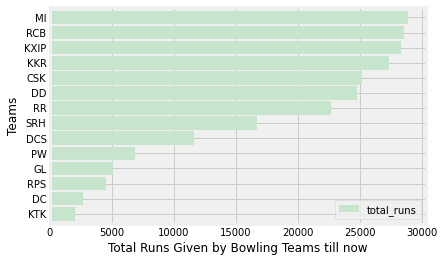

In [49]:
runs_by_team_bowl = deliveries.groupby(by='bowling_team')['bowling_team','total_runs'].sum().sort_values('total_runs',ascending=True)
ax = runs_by_team_bowl.plot.barh(width=.9,color=sns.color_palette("ch:2.5,-.2,dark=.3"))
ax.set_xlabel('Total Runs Given by Bowling Teams till now')
ax.set_ylabel('Teams')
plt.show()

In [50]:
extra_by_team = deliveries.groupby('bowling_team')['bowling_team','extra_runs'].sum().sort_values('extra_runs',ascending=False).reset_index()
extra_by_team.style.background_gradient(cmap="OrRd")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,bowling_team,extra_runs
0,MI,1612
1,RCB,1558
2,KXIP,1453
3,KKR,1372
4,DD,1268
5,RR,1245
6,CSK,1213
7,DCS,659
8,SRH,656
9,PW,335


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



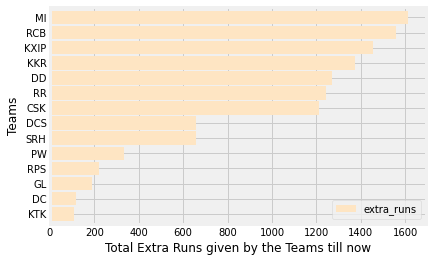

In [51]:
extra_by_team = deliveries.groupby('bowling_team')['bowling_team','extra_runs'].sum().sort_values('extra_runs',ascending=True)
ax = extra_by_team.plot.barh(width=.9,color=sns.color_palette('OrRd'))
ax.set_xlabel('Total Extra Runs given by the Teams till now')
ax.set_ylabel('Teams')
plt.show()

In [52]:
wide_by_team = deliveries.groupby('bowling_team')['bowling_team','wide_runs'].sum().sort_values('wide_runs',ascending=False).reset_index()
wide_by_team.style.background_gradient(cmap="YlGn")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,bowling_team,wide_runs
0,MI,892
1,RCB,877
2,KXIP,807
3,KKR,761
4,RR,675
5,CSK,667
6,DD,659
7,SRH,358
8,DCS,328
9,PW,174


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



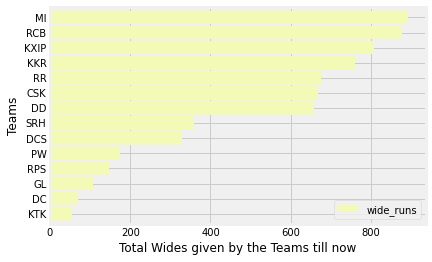

In [53]:
wide_by_team = deliveries.groupby('bowling_team')['bowling_team','wide_runs'].sum().sort_values('wide_runs',ascending=True)
ax = wide_by_team.plot.barh(width=.9,color=sns.color_palette('YlGn'))
ax.set_xlabel('Total Wides given by the Teams till now')
ax.set_ylabel('Teams')
plt.show()

In [54]:
noball_by_team = deliveries.groupby('bowling_team')['bowling_team','noball_runs'].sum().sort_values('noball_runs',ascending=False).reset_index()
noball_by_team.style.background_gradient(cmap="PRGn")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,bowling_team,noball_runs
0,MI,112
1,KXIP,103
2,RCB,92
3,DD,91
4,KKR,77
5,RR,77
6,CSK,64
7,DCS,49
8,SRH,30
9,PW,26


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



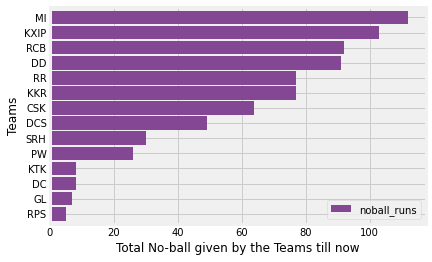

In [55]:
noball_by_team = deliveries.groupby('bowling_team')['bowling_team','noball_runs'].sum().sort_values('noball_runs',ascending=True)
ax = noball_by_team.plot.barh(width=.9,color=sns.color_palette('PRGn'))
ax.set_xlabel('Total No-ball given by the Teams till now')
ax.set_ylabel('Teams')
plt.show()

In [56]:
legbye_by_team = deliveries.groupby('bowling_team')['bowling_team','legbye_runs'].sum().sort_values('legbye_runs',ascending=False).reset_index()
legbye_by_team.style.background_gradient(cmap="PuOr")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,bowling_team,legbye_runs
0,MI,482
1,RCB,465
2,KXIP,445
3,DD,436
4,KKR,419
5,CSK,409
6,RR,393
7,SRH,226
8,DCS,215
9,PW,97


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



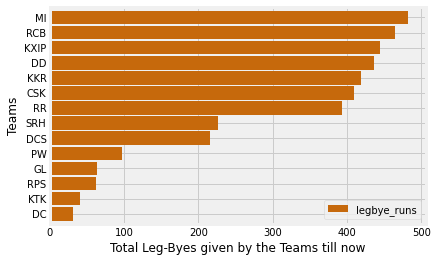

In [57]:
legbye_by_team = deliveries.groupby('bowling_team')['bowling_team','legbye_runs'].sum().sort_values('legbye_runs',ascending=True)
ax = legbye_by_team.plot.barh(width=.9,color=sns.color_palette('PuOr'))
ax.set_xlabel('Total Leg-Byes given by the Teams till now')
ax.set_ylabel('Teams')
plt.show()

In [58]:
bye_by_team = deliveries.groupby('bowling_team')['bowling_team','bye_runs'].sum().sort_values('bye_runs',ascending=False).reset_index()
bye_by_team.style.background_gradient(cmap="RdBu")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,bowling_team,bye_runs
0,RCB,124
1,MI,121
2,KKR,115
3,RR,100
4,KXIP,98
5,DD,82
6,CSK,73
7,DCS,62
8,SRH,42
9,PW,38


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



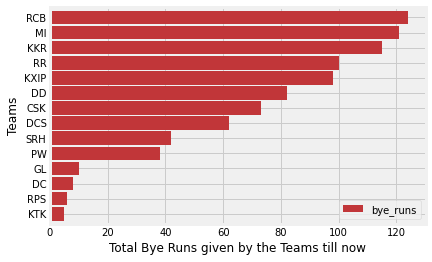

In [59]:
bye_by_team = deliveries.groupby('bowling_team')['bowling_team','bye_runs'].sum().sort_values('bye_runs',ascending=True)
ax = bye_by_team.plot.barh(width=.9,color=sns.color_palette('RdBu'))
ax.set_xlabel('Total Bye Runs given by the Teams till now')
ax.set_ylabel('Teams')
plt.show()

In [60]:
penalty_by_team = deliveries.groupby('bowling_team')['bowling_team','penalty_runs'].sum().sort_values('penalty_runs',ascending=False).reset_index()
penalty_by_team.style.background_gradient(cmap="RdGy")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,bowling_team,penalty_runs
0,DCS,5
1,MI,5
2,CSK,0
3,DC,0
4,DD,0
5,GL,0
6,KKR,0
7,KTK,0
8,KXIP,0
9,PW,0


In [61]:
z = deliveries[deliveries.penalty_runs !=0]
z

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
15476,66,2,DD,DCS,12,6,V Sehwag,S Dhawan,PP Ojha,0,0,0,0,0,5,0,5,5,0,0,0
112093,473,2,DD,MI,5,2,M Vijay,Q de Kock,SL Malinga,0,2,0,0,0,5,0,7,7,0,0,0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



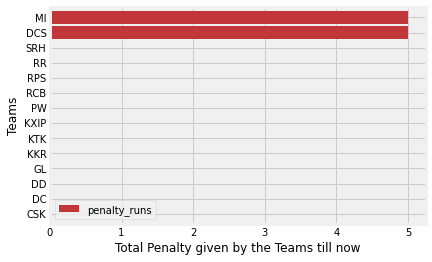

In [62]:
penalty_by_team = deliveries.groupby('bowling_team')['bowling_team','penalty_runs'].sum().sort_values('penalty_runs',ascending=True)
ax = penalty_by_team.plot.barh(width=.9,color=sns.color_palette('RdGy'))
ax.set_xlabel('Total Penalty given by the Teams till now')
ax.set_ylabel('Teams')
plt.show()

In [63]:
wickets_by_team=deliveries[deliveries['player_dismissed'] !=0].groupby('bowling_team')['player_dismissed'].count()
wickets_by_team = wickets_by_team.sort_values(ascending=False).reset_index()
wickets_by_team.style.background_gradient(cmap='Reds')

,bowling_team,player_dismissed
0,MI,1138
1,RCB,1036
2,CSK,1030
3,KKR,1010
4,KXIP,994
5,DD,912
6,RR,856
7,SRH,652
8,DCS,446
9,PW,238


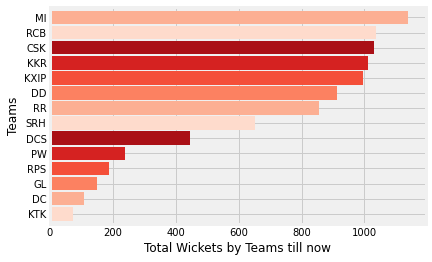

In [64]:
wickets_by_team=deliveries[deliveries['player_dismissed'] !=0].groupby('bowling_team')['player_dismissed'].count().sort_values(ascending=True)
ax = wickets_by_team.plot.barh(width=.9,color=sns.color_palette('Reds'))
ax.set_xlabel('Total Wickets by Teams till now')
ax.set_ylabel('Teams')
plt.show()

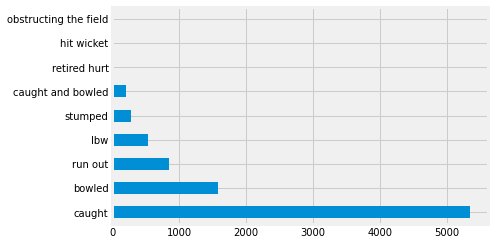

In [65]:
ipl_dismissal_kind = deliveries[deliveries.dismissal_kind !=0]
ipl_dismissal_kind = ipl_dismissal_kind['dismissal_kind'].value_counts().plot(kind='barh')

In [66]:
deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
merged_deliveries= matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
merged_deliveries.head(3)

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
1,2017,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
2,2017,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0,0,0


In [68]:
x = merged_deliveries.groupby('batting_team')['wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs','batsman_runs','extra_runs','total_runs'].sum()
x.style.background_gradient(cmap='Set1')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
batting_team,,,,,,,,
CSK,716,92,416,90,0,25104,1314,26418
DC,45,6,41,8,0,2530,100,2630
DCS,279,50,200,49,0,10885,578,11463
DD,716,83,391,73,10,23115,1273,24388
GL,134,8,74,17,0,4629,233,4862
KKR,852,117,469,86,0,25895,1524,27419
KTK,89,7,36,11,0,1758,143,1901
KXIP,728,150,483,64,0,26468,1425,27893
MI,948,97,510,90,0,28164,1645,29809


In [69]:
configure_plotly_browser_state()
%matplotlib
trace1 = go.Bar(
    x=x.index,
    y=x['wide_runs'],
    name='wide_runs'
)
trace4 = go.Bar(
    x=x.index,
    y=x['bye_runs'],
    name='bye_runs'
)
trace5 = go.Bar(
    x=x.index,
    y=x['legbye_runs'],
    name='legbye_runs'
)
trace6 = go.Bar(
    x=x.index,
    y=x['noball_runs'],
    name='noball_runs'
)
trace7 = go.Bar(
    x=x.index,
    y=x['penalty_runs'],
    name='penalty_runs'
)
trace2 = go.Bar(
    x=x.index,
    y=x['batsman_runs'],
    name='batsman_runs'
)

data = [trace1, trace2,trace4,trace5,trace6,trace7]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

Using matplotlib backend: agg


In [0]:
import plotly.express as px

In [0]:
def run_distribution_by_team(team):
  z = merged_deliveries[merged_deliveries.batsman_runs !=0]
  zz = z[z['batting_team']==team]
  #print(zz)
  zzz = zz.groupby('batsman_runs')['batsman_runs'].count()
  zzz = zzz.to_frame()
  zzz.columns = ['r_count']
  #print(zzz)
  configure_plotly_browser_state()
  fig = px.pie(values=zzz['r_count'],names=list(zzz.index),title='Distribution of Runs for '+team+' across IPL')
  fig.show()

In [72]:
run_distribution_by_team('CSK')

In [73]:
run_distribution_by_team('RCB')

In [74]:
merged_deliveries.head()

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
1,2017,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
2,2017,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0,0,0
3,2017,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
4,2017,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,0,0,0


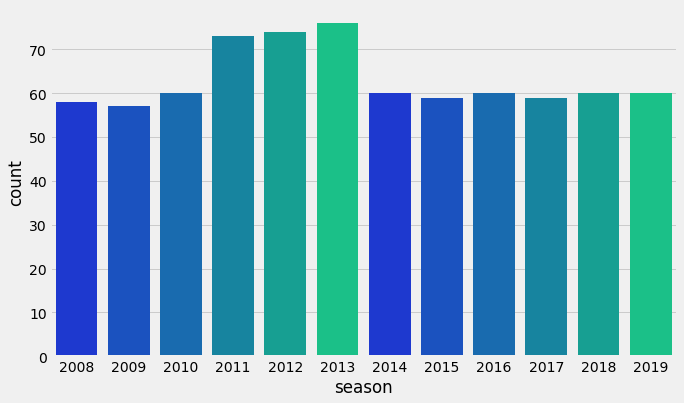

In [75]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette=sns.color_palette('winter'))  #countplot automatically counts the frequency of an item
plt.show()

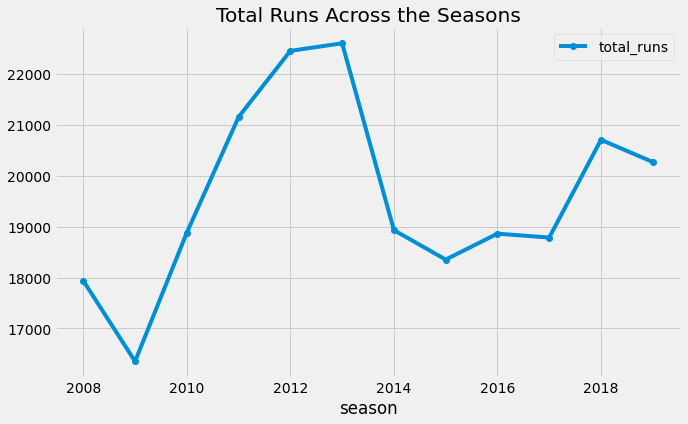

In [76]:
season_runs=merged_deliveries.groupby(['season'])['total_runs'].sum().reset_index()
season_runs.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Total Runs Across the Seasons')
plt.show()

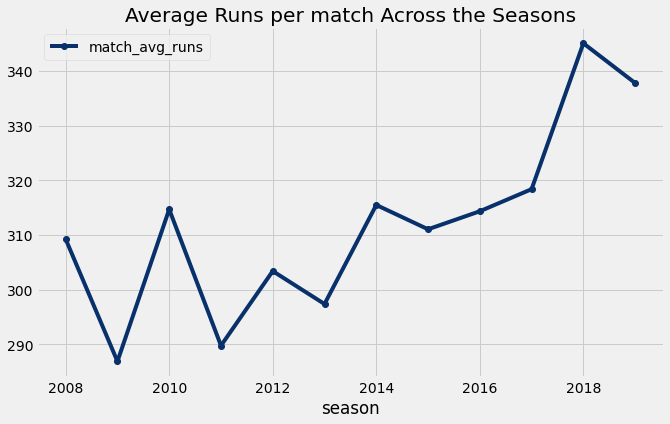

In [77]:
temp = merged_deliveries.groupby(['season','match_id'])['total_runs'].sum().reset_index()#.drop('match_id')
temp.columns = ['season','match_id','match_avg_runs']
temp = temp.groupby('season')['match_avg_runs'].mean().reset_index()
cm = plt.cm.get_cmap('hot')
temp.set_index('season').plot(marker='o',colormap='Blues_r')
plt.gcf().set_size_inches(10,6)
plt.title('Average Runs per match Across the Seasons')
plt.show()

In [78]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [0]:
matches_team = merged_deliveries.groupby('batting_team')['match_id'].nunique().reset_index()
runperover = merged_deliveries.groupby(['batting_team','over'])['total_runs'].sum().reset_index()
runperover=runperover.merge(matches_team,left_on='batting_team',right_on='batting_team',how='outer')
runperover['run_rate'] = runperover.total_runs/runperover.match_id
run_per_over = runperover[['batting_team','over','run_rate']].set_index(['batting_team','over'])
r = run_per_over.unstack(level=0)

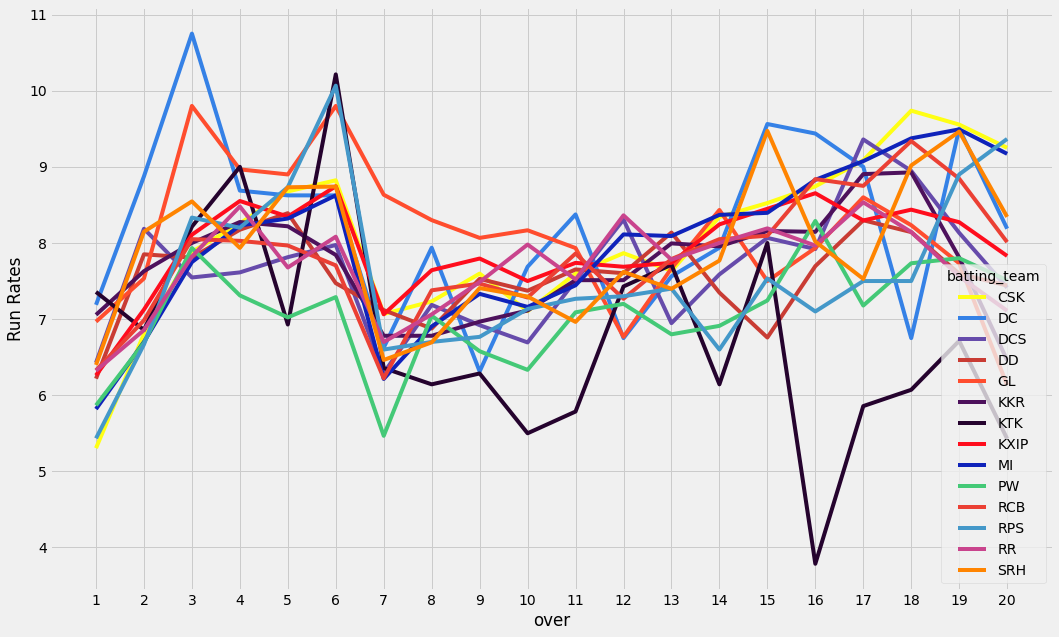

In [108]:
team = matches_team.batting_team
color = ['#ffff14','#3581e6','#664bab','#c93c34','#ff4d2e','#4d115c','#25032e','#ff0d1d','#0f23ba','#44c977','#eb4034','#4498c9','#c9448d','#ff8400']
r.run_rate[team].plot(color=color) #plotting graphs for teams that have played more than 100 matches
x=r.index
plt.xticks(x)
plt.ylabel('Run Rates')
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.show()

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
1,2017,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
2,2017,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0,0,0
3,2017,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
4,2017,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,0,0,0


In [81]:
runs_per_over = deliveries.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over

batting_team,CSK,DC,DCS,DD,GL,KKR,KTK,KXIP,MI,PW,RCB,RPS,RR,SRH
over,,,,,,,,,,,,,,
1,870,115,482,1001,209,1256,103,1102,1088,264,1139,163,923,691
2,1116,142,614,1264,226,1358,96,1254,1253,301,1257,200,1001,880
3,1293,172,566,1257,294,1424,115,1427,1449,357,1449,250,1142,923
4,1354,139,571,1316,269,1473,126,1505,1539,329,1445,246,1238,857
5,1423,138,586,1351,267,1463,97,1469,1556,316,1434,262,1121,943
6,1447,138,598,1203,294,1396,143,1539,1613,328,1387,302,1180,944
7,1159,106,472,1146,259,1207,89,1243,1162,246,1120,198,978,698
8,1186,127,539,1107,249,1207,86,1345,1291,317,1328,201,1031,723
9,1246,101,519,1212,242,1240,88,1372,1371,296,1344,203,1093,800


In [0]:
high_wickettaker_all = merged_deliveries[merged_deliveries.player_dismissed != 0]

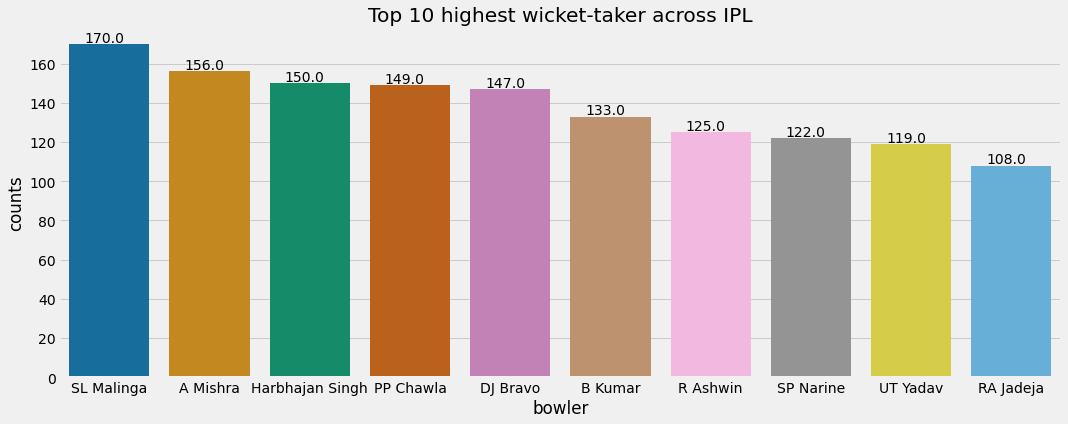

In [83]:
high_wickettaker_all = high_wickettaker_all[(high_wickettaker_all.dismissal_kind !='retired hurt') & (high_wickettaker_all.dismissal_kind !='obstructing the field'
) & (high_wickettaker_all.dismissal_kind !='run out') ]#,'obstructing the field','run out']]
high_wickettaker = high_wickettaker_all.bowler.value_counts().reset_index()
high_wickettaker = pd.DataFrame(high_wickettaker)
high_wickettaker.columns = ['bowler','counts']
high_wickettaker = high_wickettaker.sort_values(by='counts',ascending=False)
plt.subplots(figsize=(16,6))
plt.title('Top 10 highest wicket-taker across IPL')
ax = sns.barplot(y='counts',x='bowler',data=high_wickettaker[:10],palette=sns.color_palette('colorblind',20))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
     plt.show()


In [0]:
def purple_cap(season):
  purple_cap = high_wickettaker_all[high_wickettaker_all.season==season]
  purple_cap = purple_cap.bowler.value_counts().reset_index()
  purple_cap.columns = ['bowler','wicket']
  #purple_cap.head(5)
  plt.subplots(figsize=(16,4))
  plt.title('Top 5 PURPLE CAP contendors in IPL-'+str(season))
  values = purple_cap.wicket[:5]
  print(str(list(purple_cap.bowler[:1]))+' won the PURPLE CAP in IPL- ',str(season))
  clrs = ['grey' if (x < max(values)) else 'purple' for x in values ]
  ax=sns.barplot(x='bowler', y='wicket',data=purple_cap[:5], palette=clrs) # color=clrs)
  for p in ax.patches:
      ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
      plt.show()

['Imran Tahir'] won the PURPLE CAP in IPL-  2019


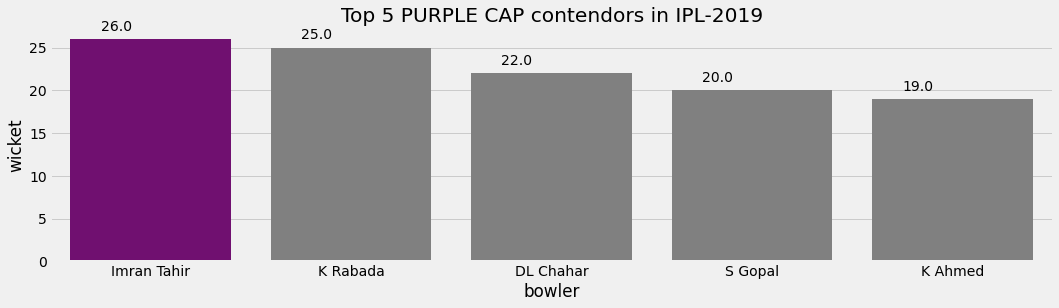

In [85]:
purple_cap(2019)

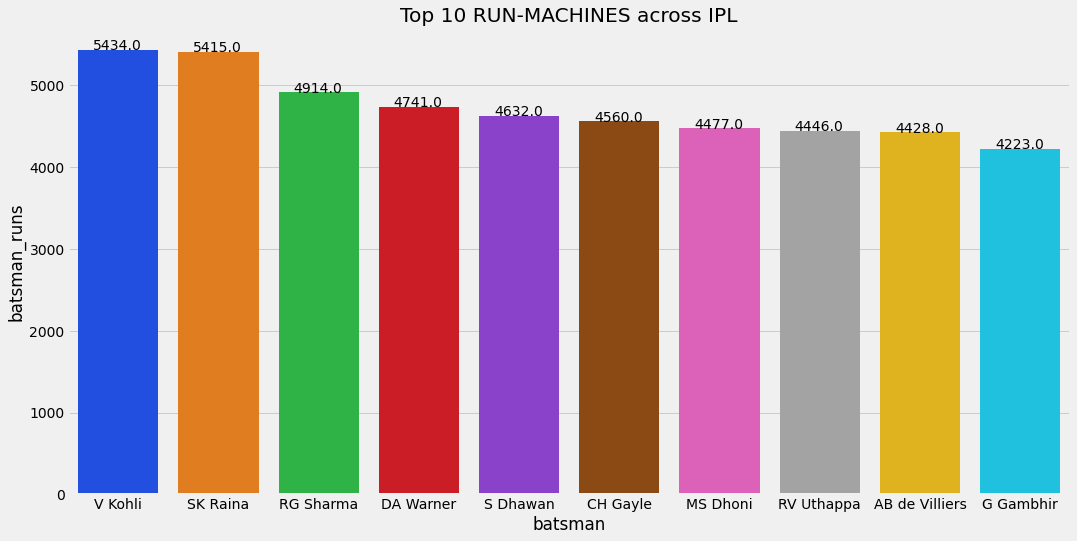

In [86]:
highest_run_scorer = merged_deliveries.groupby('batsman')['batsman_runs'].sum().reset_index()
highest_run_scorer = highest_run_scorer.sort_values('batsman_runs',ascending=False)

plt.subplots(figsize=(16,8))
plt.title('Top 10 RUN-MACHINES across IPL')
ax = sns.barplot(y='batsman_runs',x='batsman',data=highest_run_scorer[:10],palette=sns.color_palette('bright',20))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
     plt.show()

In [0]:
def orange_cap(season):
  orange_cap = merged_deliveries[merged_deliveries.season==season]
  orange_cap = orange_cap.batsman.value_counts().reset_index()
  orange_cap.columns = ['batsman','runs']
  #print(orange_cap.head(5))
  plt.subplots(figsize=(16,4))
  plt.title('Top 5 ORANGE CAP contendors in IPL-'+str(season))
  values = orange_cap.runs[:5]
  print(str(str(orange_cap.batsman[:1].values))+' won the ORANGE CAP in IPL- ',season)
  clrs = ['grey' if (x < max(values)) else 'Orange' for x in values ]
  ax=sns.barplot(x='batsman', y='runs',data=orange_cap[:5], palette=clrs) # color=clrs)
  for p in ax.patches:
      ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
      plt.show()

['DA Warner'] won the ORANGE CAP in IPL-  2019


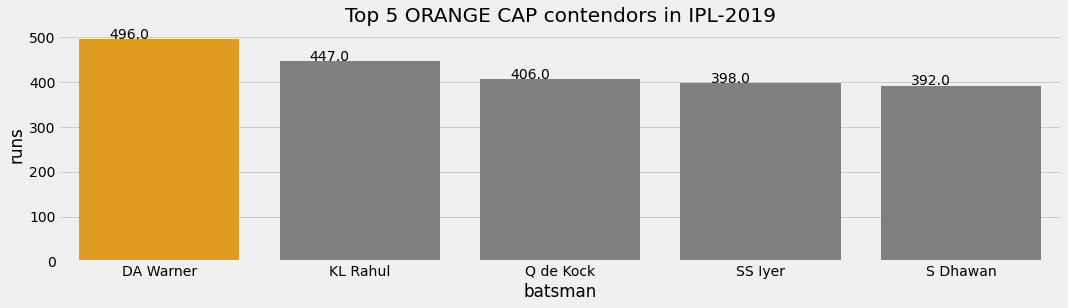

In [88]:
orange_cap(2019)

In [89]:
merged_deliveries.match_id

0             1
1             1
2             1
3             1
4             1
          ...  
179073    11415
179074    11415
179075    11415
179076    11415
179077    11415
Name: match_id, Length: 179078, dtype: int64

In [90]:
merged_deliveries.head(3)

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
1,2017,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
2,2017,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0,0,0


In [91]:
innings = deliveries.groupby('batsman')['match_id'].nunique().reset_index()
bat=deliveries.groupby(['batsman'])['ball'].count().reset_index()
runs=deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
bat = innings.merge(bat,left_on='batsman',right_on='batsman',how='outer')
bat=bat.merge(runs,left_on='batsman',right_on='batsman',how='outer')
bat.rename({'match_id':'Innings','ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=deliveries.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
bat['strike_rate']=np.round(bat['ball_y']/bat['ball_x']*100,2)
bat['bat_average'] = np.round((bat.ball_y/bat.Innings),2)
bat=bat.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
bat=bat.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman'])['batsman_runs'].max().reset_index()
bat=bat.merge(compare,left_on='batsman',right_on='batsman',how='outer')
bat.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batsman_runs':'Highest_score'},axis=1,inplace=True)
bat[1:].sort_values('runs',ascending=False).head(10)

,batsman,Innings,balls,runs,strike_rate,bat_average,6's,4's,Highest_score
486,V Kohli,169,4211,5434,129.04,32.15,482,191,113
428,SK Raina,189,4044,5415,133.90,28.65,495,195,100
367,RG Sharma,182,3816,4914,128.77,27.00,431,194,109
112,DA Warner,126,3398,4741,139.52,37.63,459,181,126
392,S Dhawan,158,3776,4632,122.67,29.32,526,96,98
92,CH Gayle,124,3131,4560,145.64,36.77,376,327,175
290,MS Dhoni,170,3318,4477,134.93,26.34,297,207,89
384,RV Uthappa,170,3492,4446,127.32,26.15,436,156,87
26,AB de Villiers,142,2977,4428,148.74,31.18,357,214,133
147,G Gambhir,151,3524,4223,119.84,27.97,492,59,93


Best Bowling in Match (BBM)

In [0]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct=deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds)]
#ct.replace([NaN,nan],[0,0],inplace=True)
bbm = ct.groupby(['match_id','bowler'])['player_dismissed'].count().reset_index()
bbm = bbm.sort_values('player_dismissed',ascending=True)
#bbm
bowl_over = deliveries.groupby(['match_id','bowler'])['total_runs'].sum().reset_index()
bowl_over = bowl_over.sort_values('total_runs',ascending=False)
bowl_wicket_over = bbm.merge(bowl_over,left_on=['match_id','bowler'],right_on=['match_id','bowler'],how='outer')
bf = bowl_wicket_over.groupby(['bowler']).max().reset_index()
bf = bf[['bowler','player_dismissed','total_runs']]

bf['player_dismissed']=bf['player_dismissed'].fillna(0)
bf['player_dismissed']=bf['player_dismissed'].astype(int)
bf['bbm'] = bf[['player_dismissed', 'total_runs']].astype(str).apply(lambda x: ' / '.join(x), axis=1)
bf.replace('NaN', np.NaN)
bfs = bf[['bowler','bbm']]

In [0]:
four_wicket=bowl_wicket_over.groupby('bowler')['player_dismissed'].agg(lambda x: (x==4).sum()).reset_index()
four_wicket.columns = ['bowler','4W']
fifer = bowl_wicket_over.groupby('bowler')['player_dismissed'].agg(lambda x: (x>4).sum()).reset_index()
fifer.columns = ['bowler','5W']

In [96]:
innings = deliveries.groupby('bowler')['match_id'].nunique().reset_index()
balls=deliveries.groupby(['bowler'])['ball'].count().reset_index()
runs=deliveries.groupby(['bowler'])['total_runs'].sum().reset_index()
balls = innings.merge(balls,left_on='bowler',right_on='bowler',how='outer')
balls=balls.merge(runs,left_on='bowler',right_on='bowler',how='outer')
balls.rename({'match_id':'Innings','ball':'ball_x','total_runs':'runs_given'},axis=1,inplace=True)
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct=deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds)]
wickets = ct.groupby('bowler')['player_dismissed'].count().reset_index()
balls=balls.merge(wickets,left_on='bowler',right_on='bowler',how='outer')
balls['strike_rate']=np.round((balls.ball_x/balls.player_dismissed),2)
balls['average'] = np.round((balls.runs_given/balls.player_dismissed),2)
balls['economy']=np.round(balls['runs_given']/(balls['ball_x']/6),2)
balls=balls.merge(bfs,left_on='bowler',right_on='bowler',how='outer')
balls=balls.merge(four_wicket,left_on='bowler',right_on='bowler',how='outer')
balls=balls.merge(fifer,left_on='bowler',right_on='bowler',how='outer')
balls[['player_dismissed','strike_rate','average','4W','5W']]=balls[['player_dismissed','strike_rate','average','4W','5W']].fillna(0)
balls[['player_dismissed','4W','5W']]=balls[['player_dismissed','4W','5W']].astype(int)
balls.rename({'ball_x':'balls','player_dismissed':'wickets'},axis=1,inplace=True)
balls = balls.sort_values('wickets',ascending=False)
balls.head(10)

,bowler,Innings,balls,runs_given,wickets,strike_rate,average,economy,bbm,4W,5W
340,SL Malinga,122,2974,3511,170,17.49,20.65,7.08,5 / 58,6,1
7,A Mishra,147,3172,3850,156,20.33,24.68,7.28,5 / 56,3,1
126,Harbhajan Singh,157,3451,4050,150,23.01,27.00,7.04,5 / 60,1,1
264,PP Chawla,156,3157,4153,149,21.19,27.87,7.89,4 / 67,2,0
93,DJ Bravo,131,2711,3733,147,18.44,25.39,8.26,4 / 56,2,0
53,B Kumar,117,2707,3264,133,20.35,24.54,7.23,5 / 58,2,1
269,R Ashwin,136,3016,3391,125,24.13,27.13,6.75,4 / 58,1,0
347,SP Narine,109,2600,2939,122,21.31,24.09,6.78,5 / 48,6,1
381,UT Yadav,118,2605,3640,119,21.89,30.59,8.38,4 / 65,2,0
282,RA Jadeja,142,2541,3221,108,23.53,29.82,7.61,5 / 57,3,1


Best Bowling Figure in the IPL

In [97]:
ipl_best_bowl = bf[bf.player_dismissed==bf.player_dismissed.max()] 
ipl_best_bowl = ipl_best_bowl[ipl_best_bowl.total_runs ==ipl_best_bowl.total_runs.min()]
ipl_best_bowl [['bowler','bbm']]

,bowler,bbm
365,Sohail Tanvir,6 / 41


In [98]:
most_fifer = balls.sort_values(by='5W',ascending=False)
most_fifer.head()

,bowler,Innings,balls,runs_given,wickets,strike_rate,average,economy,bbm,4W,5W
158,JP Faulkner,60,1287,1849,61,21.10,30.31,8.62,5 / 55,1,2
147,JD Unadkat,72,1541,2244,77,20.01,29.14,8.74,5 / 59,0,2
340,SL Malinga,122,2974,3511,170,17.49,20.65,7.08,5 / 58,6,1
5,A Joseph,3,55,94,6,9.17,15.67,10.25,6 / 53,0,1
40,AS Rajpoot,23,452,665,22,20.55,30.23,8.83,5 / 53,0,1


In [99]:
most_four = balls.sort_values(by='4W',ascending=False)
most_four.head()

,bowler,Innings,balls,runs_given,wickets,strike_rate,average,economy,bbm,4W,5W
340,SL Malinga,122,2974,3511,170,17.49,20.65,7.08,5 / 58,6,1
347,SP Narine,109,2600,2939,122,21.31,24.09,6.78,5 / 48,6,1
32,AJ Tye,26,618,871,39,15.85,22.33,8.46,5 / 52,3,1
134,Imran Tahir,55,1249,1656,79,15.81,20.96,7.96,4 / 59,3,0
282,RA Jadeja,142,2541,3221,108,23.53,29.82,7.61,5 / 57,3,1


In [120]:
balls.loc[balls['bowler']=='B Kumar'] 

,bowler,Innings,balls,runs_given,wickets,strike_rate,average,economy,bbm,4W,5W
53,B Kumar,117,2707,3264,133,20.35,24.54,7.23,5 / 58,2,1


In [129]:
balls.loc[balls['wickets']>50].sort_values('average',ascending=True).head(5) 

,bowler,Innings,balls,runs_given,wickets,strike_rate,average,economy,bbm,4W,5W
340,SL Malinga,122,2974,3511,170,17.49,20.65,7.08,5 / 58,6,1
134,Imran Tahir,55,1249,1656,79,15.81,20.96,7.96,4 / 59,3,0
301,Rashid Khan,46,1106,1257,55,20.11,22.85,6.82,3 / 55,0,0
225,MM Patel,63,1382,1733,74,18.68,23.42,7.52,5 / 55,2,1
358,Sandeep Sharma,68,1546,1967,83,18.63,23.70,7.63,4 / 66,2,0


In [101]:
caught = deliveries[deliveries.dismissal_kind=='caught']
caught = caught.groupby('fielder')['bowler'].count().reset_index()
caught.columns = ['feilder','catches']
caught = caught.sort_values('catches',ascending=False)
caught.head(5)

,feilder,catches
206,KD Karthik,109
408,SK Raina,99
277,MS Dhoni,98
19,AB de Villiers,93
368,RV Uthappa,84


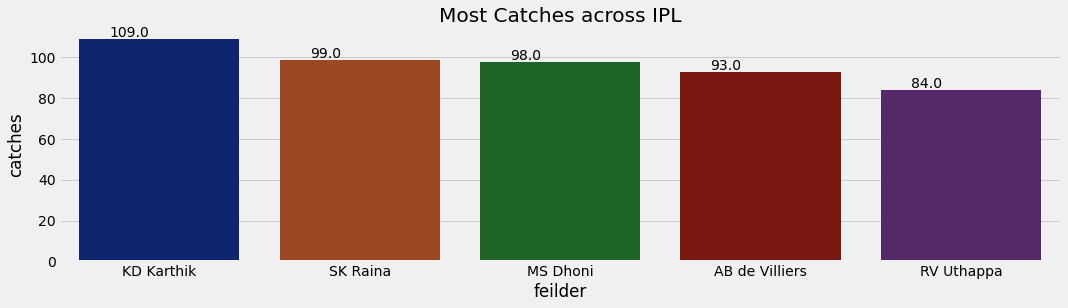

In [102]:
plt.subplots(figsize=(16,4))
plt.title('Most Catches across IPL')
ax = sns.barplot(y='catches',x='feilder',data=caught[:5],palette=sns.color_palette('dark',20))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
     plt.show()

In [103]:
runouts = deliveries[deliveries.dismissal_kind=='run out']
runouts = runouts.groupby('fielder')['dismissal_kind'].count().reset_index()
runouts.columns = ['fielder','runout']
runouts = runouts.sort_values('runout',ascending=False)
runouts.head(5)

,fielder,runout
147,MS Dhoni,23
184,RA Jadeja,20
244,V Kohli,17
212,SK Raina,16
140,MK Pandey,14


In [115]:
bat_runouts = deliveries[deliveries.dismissal_kind=='run out']
bat_runouts = bat_runouts.groupby('player_dismissed')['dismissal_kind'].count().reset_index()
bat_runouts.columns = ['batsman','runout']
bat_runouts = bat_runouts.sort_values('runout',ascending=False)
bat_runouts.head(5)

,batsman,runout
79,G Gambhir,16
219,S Dhawan,14
238,SK Raina,13
28,AT Rayudu,13
146,M Vijay,12


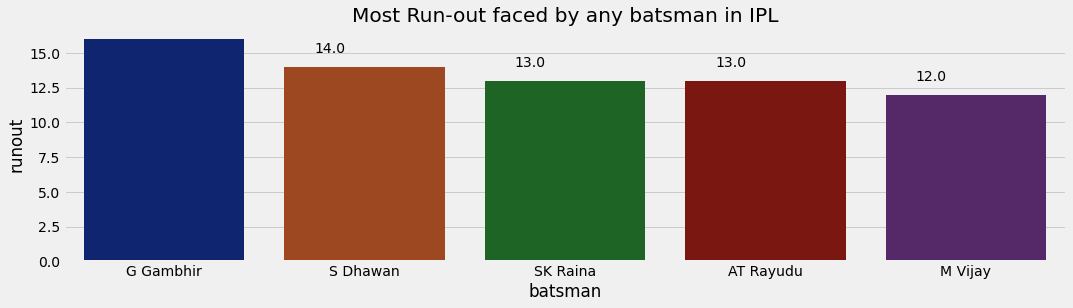

In [118]:
plt.subplots(figsize=(16,4))
plt.title('Most Run-out faced by any batsman in IPL')
ax = sns.barplot(y='runout',x='batsman',data=bat_runouts[:5],palette=sns.color_palette('dark',20))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
     plt.show()

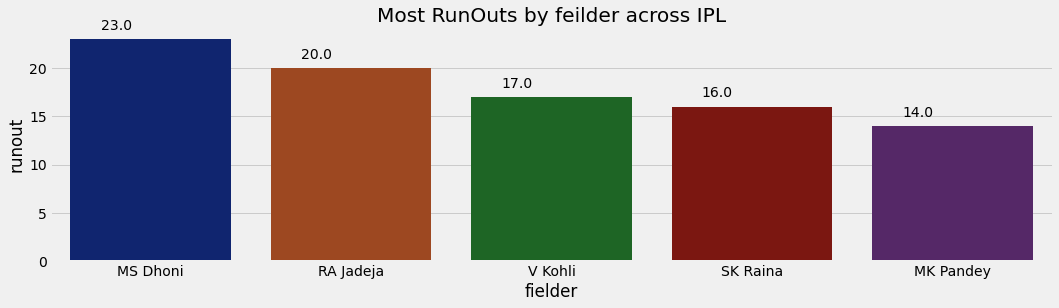

In [119]:
plt.subplots(figsize=(16,4))
plt.title('Most RunOuts by feilder across IPL')
ax = sns.barplot(y='runout',x='fielder',data=runouts[:5],palette=sns.color_palette('dark',20))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
     plt.show()